In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
orders_file = "./sales_2019-01-01_2022-08-16.csv"
scooter_df = pd.read_csv(orders_file, keep_default_na=False) #daily order file
scooter_df['date'] = pd.to_datetime(scooter_df['day'])
scooter_df = scooter_df.sort_values('date')
scooter_df.head()

,product_title,variant_title,variant_sku,shipping_country,product_vendor,shipping_postal_code,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,date
3856,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,30.5AH (62 miles) / Black,emove-305-black,Switzerland,EMOVE,1290,2019-01-06,1,1899.0,0.0,0.0,1899.0,0.0,1899.0,2019-01-06
3892,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,30.5AH (62 miles) / Orange,emove-305-orange,Canada,EMOVE,M4E1H1,2019-01-10,1,1899.0,0.0,0.0,1899.0,0.0,1899.0,2019-01-10
5257,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / Black,emove-26-black,Sweden,EMOVE,11360,2019-01-11,1,1735.0,-173.5,0.0,1561.5,0.0,1561.5,2019-01-11
5258,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / Black,emove-26-black,Mexico,EMOVE,44380,2019-01-12,1,1735.0,-173.5,0.0,1561.5,0.0,1561.5,2019-01-12
4567,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / White,emove-26-white,United States,EMOVE,94118,2019-01-17,1,1735.0,0.0,0.0,1735.0,0.0,1735.0,2019-01-17


In [ ]:
df = scooter_df[['variant_sku', 'date', 'net_quantity']].groupby(['variant_sku', 'date']).sum().reset_index()
df.head()

,variant_sku,date,net_quantity
0,,2019-05-27,1
1,,2019-05-31,1
2,,2019-06-01,1
3,,2019-06-03,1
4,,2019-06-12,-1


In [ ]:
df[['variant_sku', 'net_quantity']].groupby(['variant_sku']).sum().reset_index().sort_values('net_quantity', ascending=False)

,variant_sku,net_quantity
10,CRUISER-Orange,2290
8,CRUISER-Black,1776
14,Cruiser-Black,1772
13,CRUISER-White,1424
15,Cruiser-Purple,720
...,...,...
31,Early-2021-Cruiser-Red-New,1
116,refurb-CRUISER-yellow,0
117,refurb-dualtron-x2,0
72,Refurbished-KAABO-offroad-wolf-king,0


In [ ]:
def ith_best_seller(i):
  sum_of_sales_units = df[['variant_sku', 'net_quantity']].groupby(['variant_sku']).sum().reset_index()
  return sum_of_sales_units.sort_values('net_quantity', ascending=False).iloc[i]['variant_sku']

print('The best seller is', ith_best_seller(0))

The best seller is CRUISER-Orange


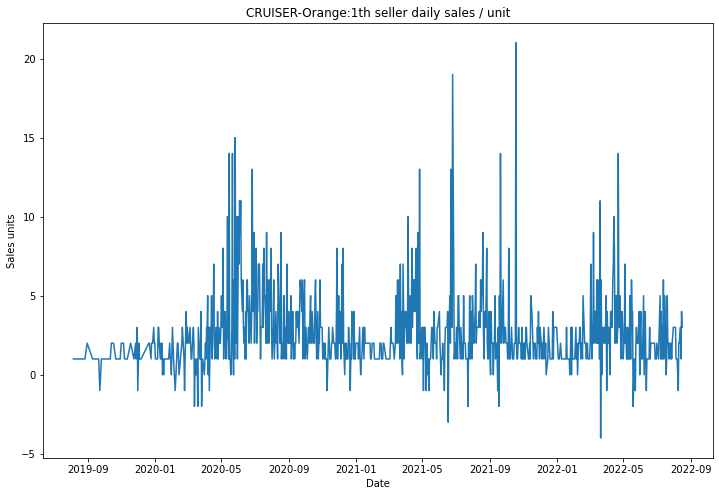

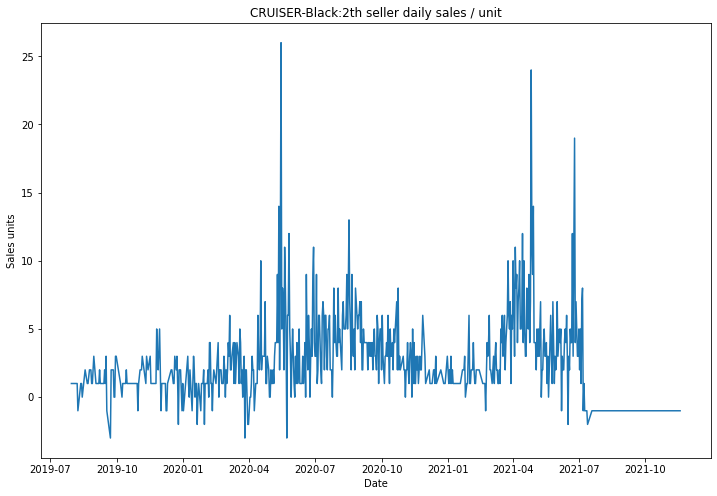

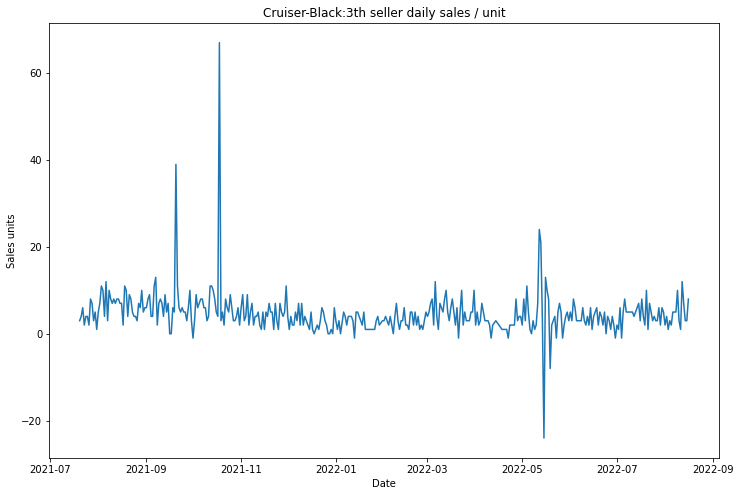

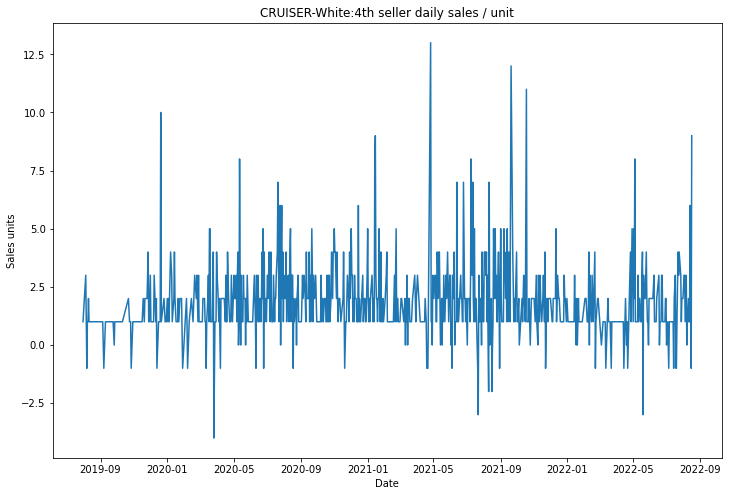

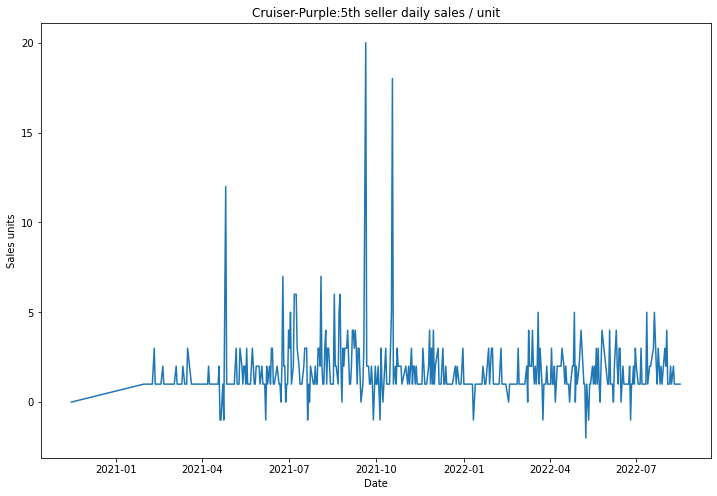

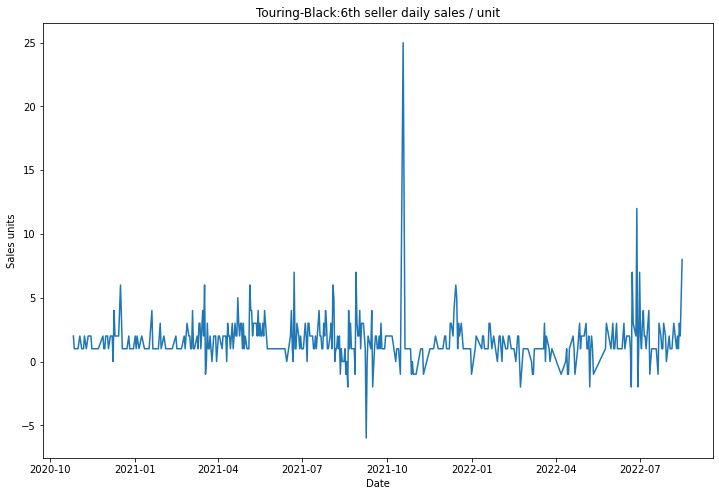

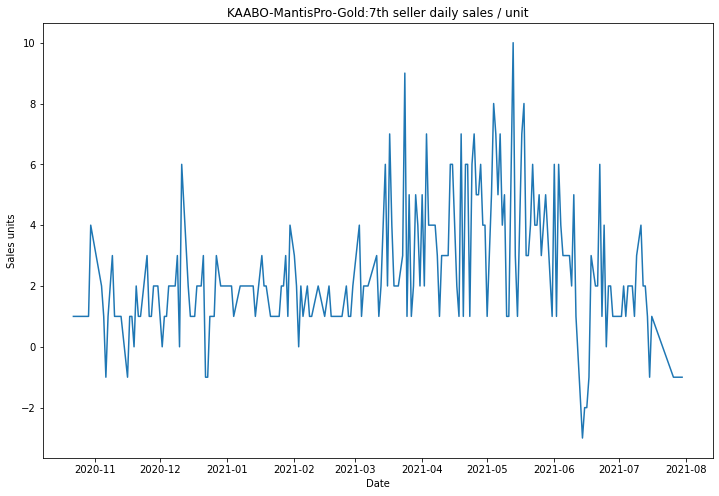

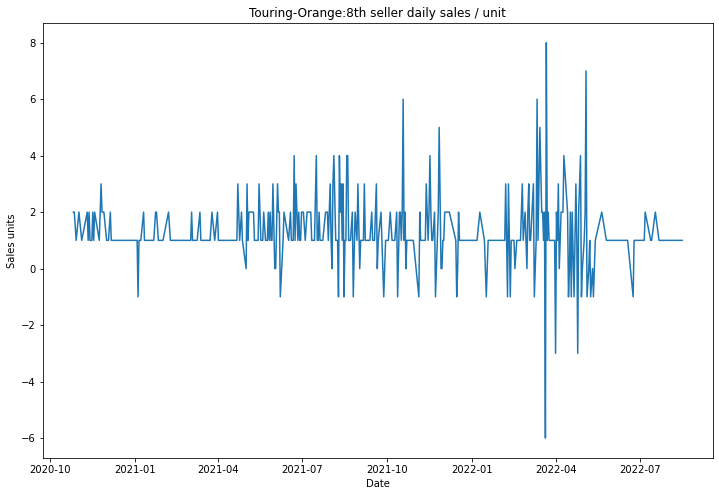

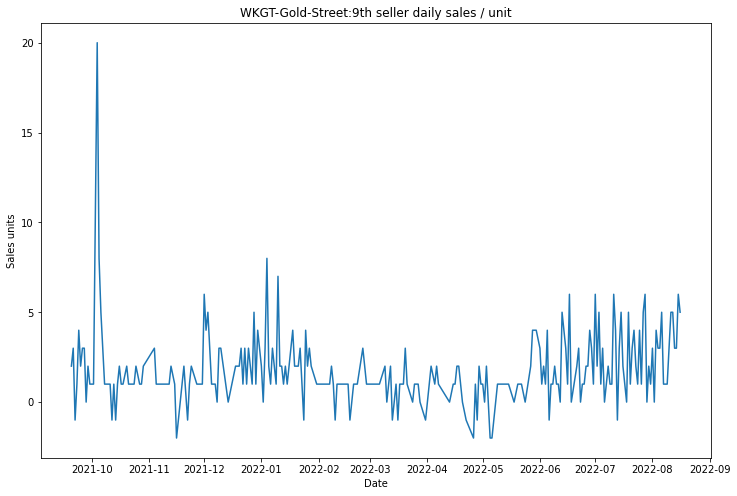

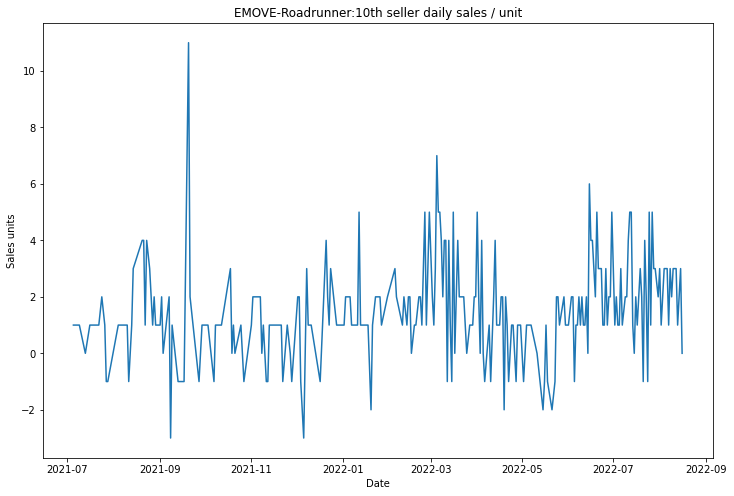

In [ ]:
for rank in range(10):
  rank_seller = ith_best_seller(rank)
  # Plot scatter
  fig = plt.figure(figsize=(12, 8))
  plt.plot(df[df['variant_sku'] == rank_seller]['date'], df[df['variant_sku'] == rank_seller]["net_quantity"])

  # Labelling 

  plt.xlabel("Date")
  plt.ylabel("Sales units")
  plt.title(rank_seller + ':' + str(rank+1) + 'th seller daily sales / unit')

  # Display
  plt.show()


In [ ]:
###########################################
#####  PLAN OF ATTACK MOVING FORWARD  #####
###########################################

"""
Data cleaning:
- weekly aggregation
- join same products with different names
- add feature/holiday for weekly aggregated data
- sku (product and color)

Modeling:
- finish prediction for the top2/top3 products (all different colors)
- simple classification algorithm/or manual selection of different types of time series 
(1. ones with abundant and regular data 2. ones with insufficient data and unclear seasonality)
- do different models for different groups of time series 
"""

'\nData cleaning:\n- weekly aggregation\n- join same products with different names\n- add feature/holiday for weekly aggregated data\n- sku (product and color)\n\nModeling:\n- finish prediction for the top2/top3 products (all different colors)\n- simple classification algorithm/or manual selection of different types of time series \n(1. ones with abundant and regular data 2. ones with insufficient data and unclear seasonality)\n- do different models for different groups of time series \n'

# Data Cleaning
- aggregate to weekly data

In [ ]:
df['week'] = df['date'].dt.week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_weekly = df.groupby(['variant_sku', 'week', 'year']).agg({'date': 'min', 'net_quantity': 'sum'}).reset_index().sort_values(['variant_sku', 'date']).reset_index()
df_weekly = df_weekly[['variant_sku', 'week', 'date', 'net_quantity']]
df_weekly

,variant_sku,week,date,net_quantity
0,,22,2019-05-27,3
1,,23,2019-06-03,1
2,,24,2019-06-12,-1
3,,27,2019-07-02,-2
4,,37,2021-09-15,23
...,...,...,...,...
2929,wolf-warrior-x-gold-street,20,2022-05-17,2
2930,wolf-warrior-x-gold-street,21,2022-05-25,1
2931,wolf-warrior-x-gold-street,22,2022-06-04,1
2932,wolf-warrior-x-gold-street,26,2022-06-28,4


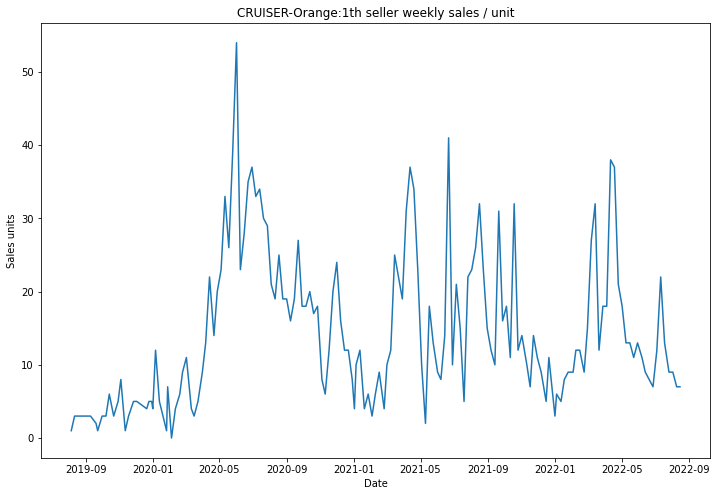

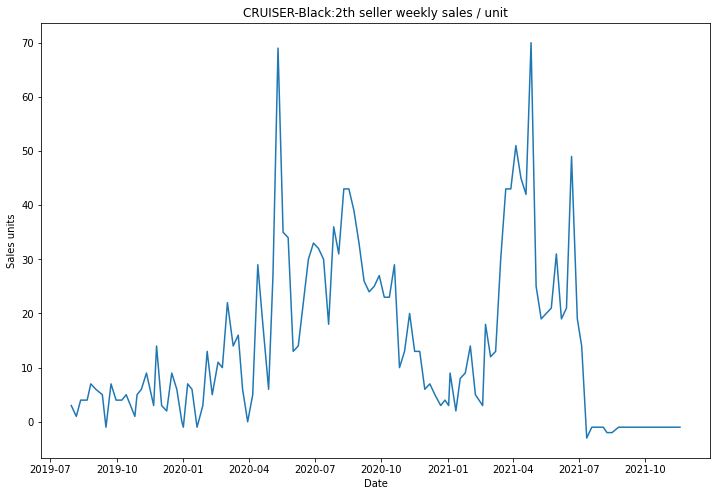

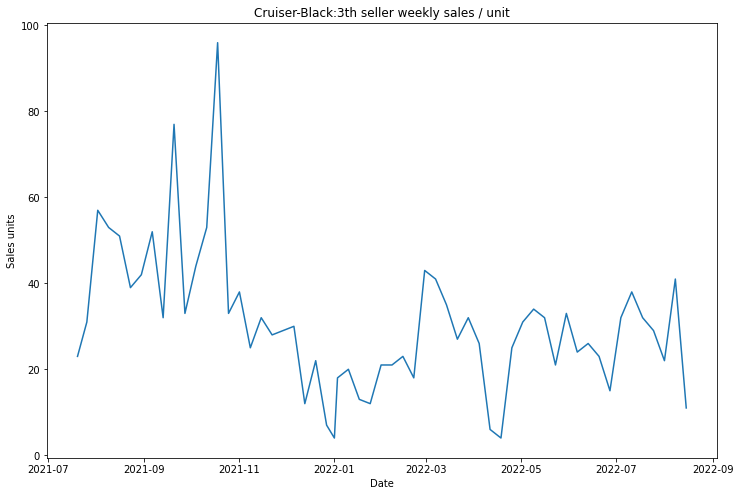

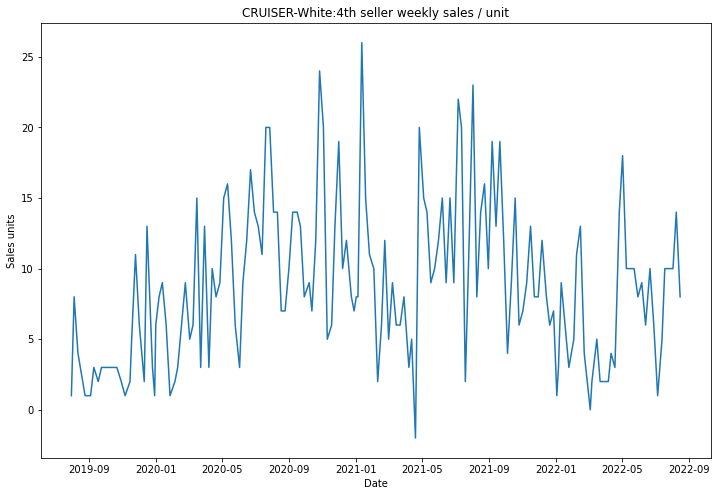

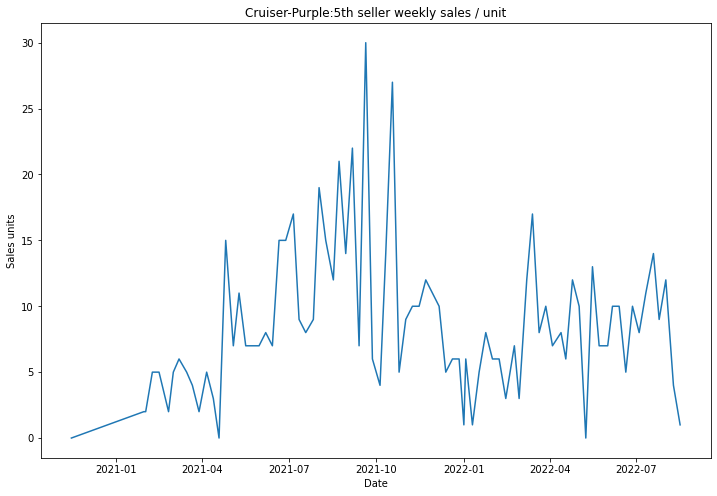

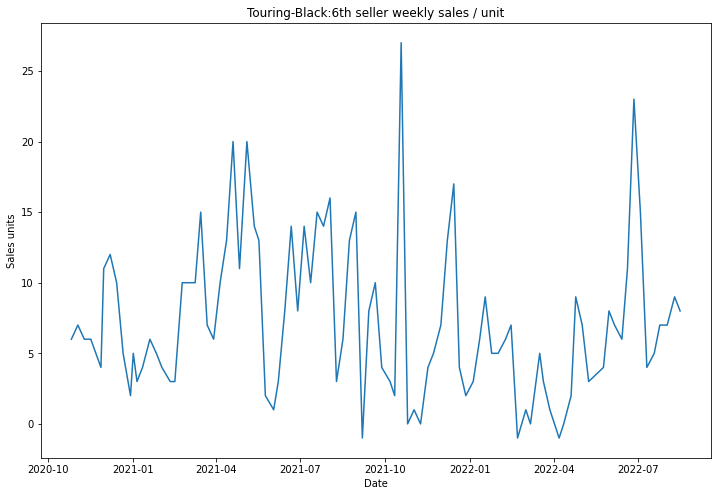

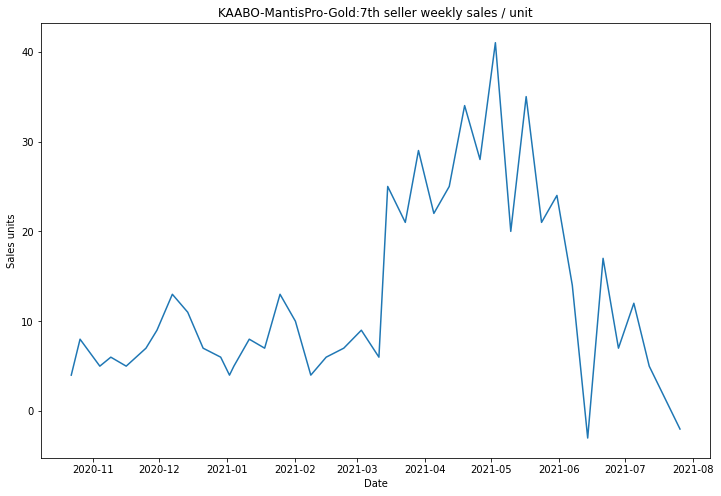

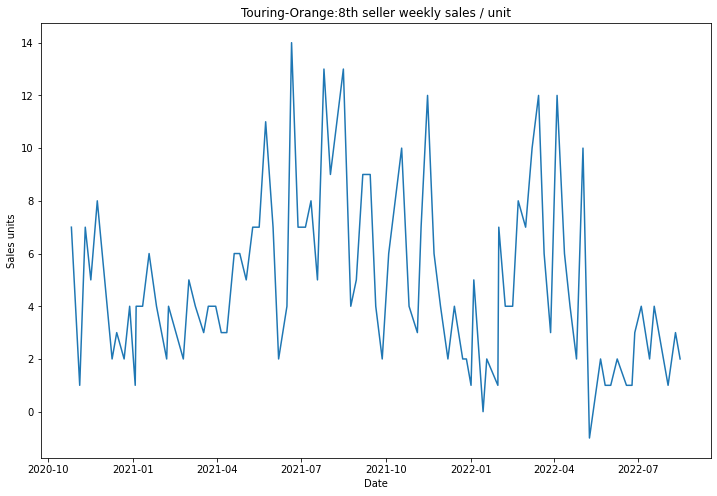

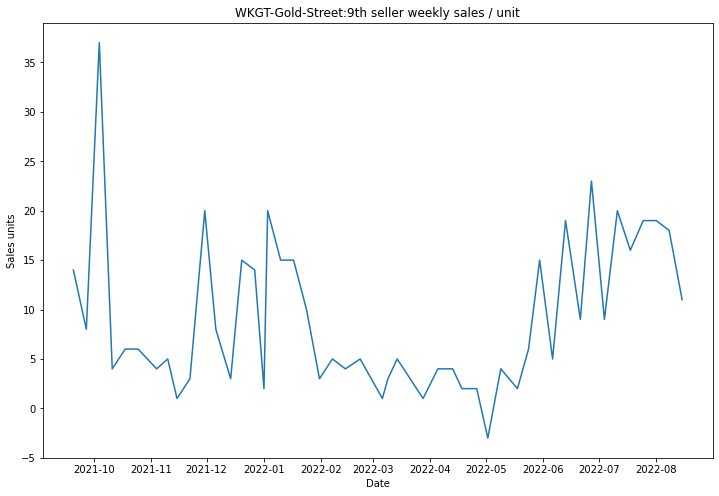

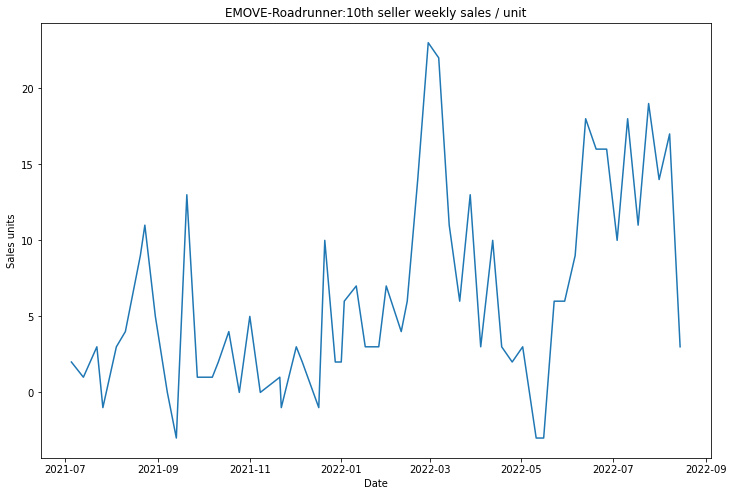

In [ ]:
for rank in range(10):
  rank_seller = ith_best_seller(rank)
  # Plot scatter
  fig = plt.figure(figsize=(12, 8))
  plt.plot(df_weekly[df_weekly['variant_sku'] == rank_seller]['date'], df_weekly[df_weekly['variant_sku'] == rank_seller]["net_quantity"])

  # Labelling 

  plt.xlabel("Date")
  plt.ylabel("Sales units")
  plt.title(rank_seller + ':' + str(rank+1) + 'th seller weekly sales / unit')

  # Display
  plt.show()


In [ ]:
df_monthly = df.groupby(['variant_sku', 'month', 'year']).agg({'date': 'min', 'net_quantity': 'sum'}).reset_index().sort_values(['variant_sku', 'date']).reset_index()
df_monthly = df_monthly[['variant_sku', 'month', 'date', 'net_quantity']]
df_monthly

,variant_sku,month,date,net_quantity
0,,5,2019-05-27,2
1,,6,2019-06-01,1
2,,7,2019-07-02,-2
3,,9,2021-09-15,22
4,2022-KAABO-MantisPro-Black-18.2AH,2,2022-02-03,1
...,...,...,...,...
978,wolf-warrior-x-gold-street,3,2022-03-06,6
979,wolf-warrior-x-gold-street,4,2022-04-01,17
980,wolf-warrior-x-gold-street,5,2022-05-04,7
981,wolf-warrior-x-gold-street,6,2022-06-04,5


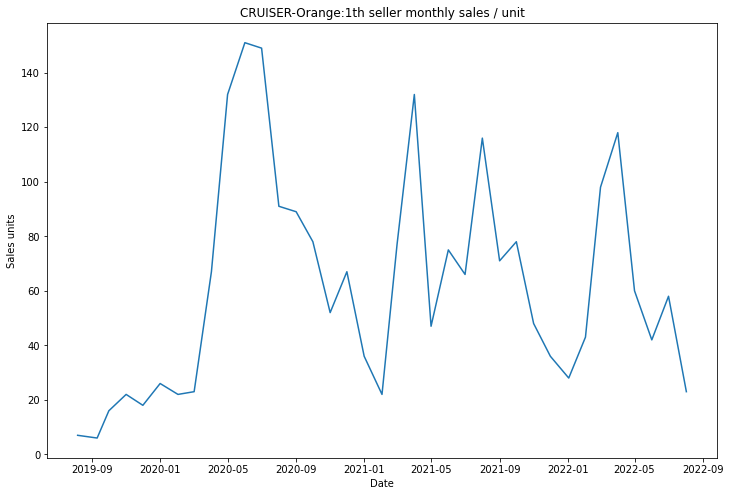

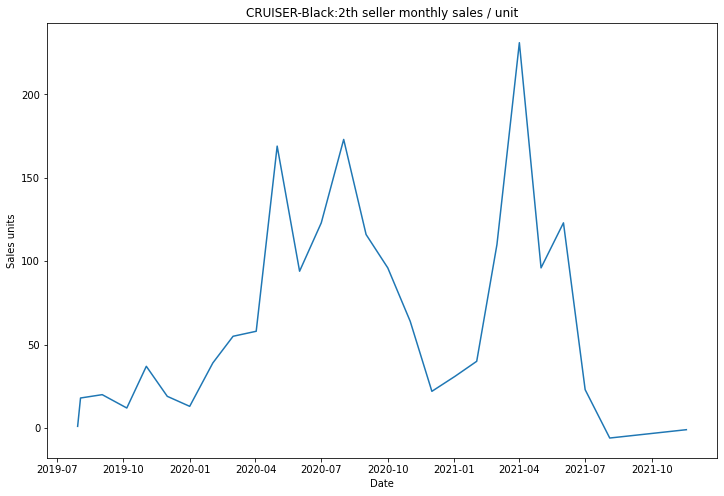

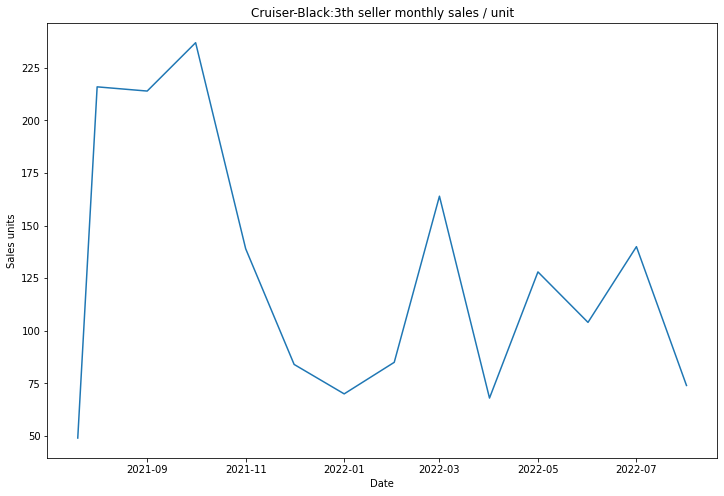

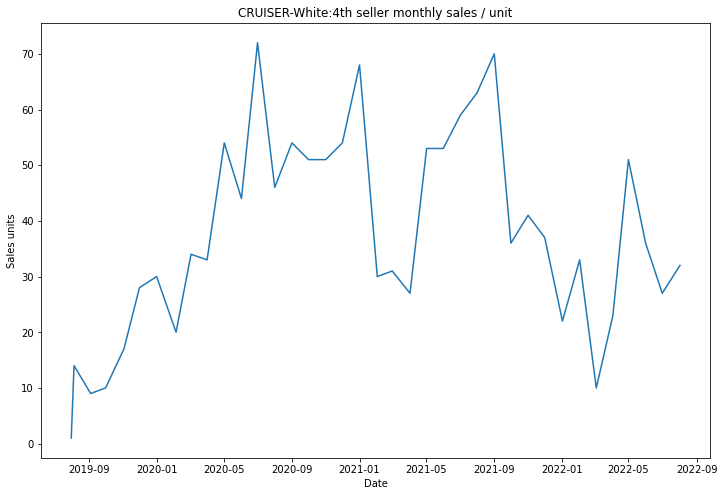

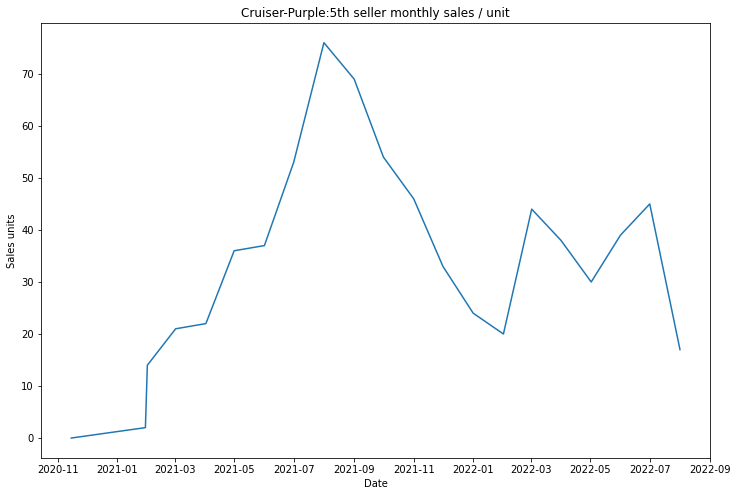

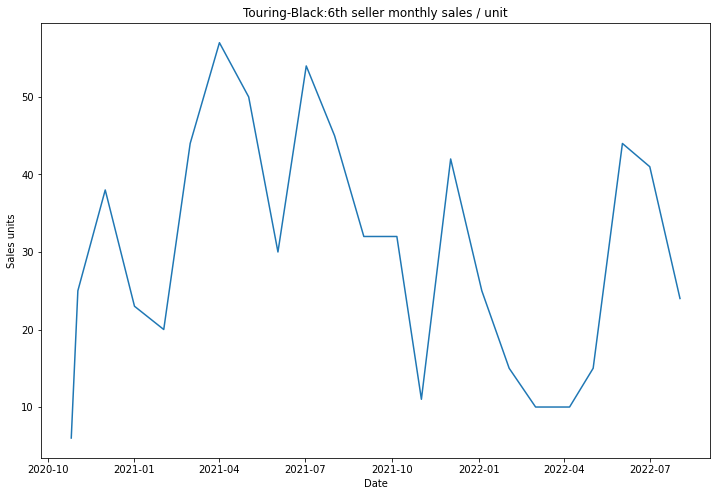

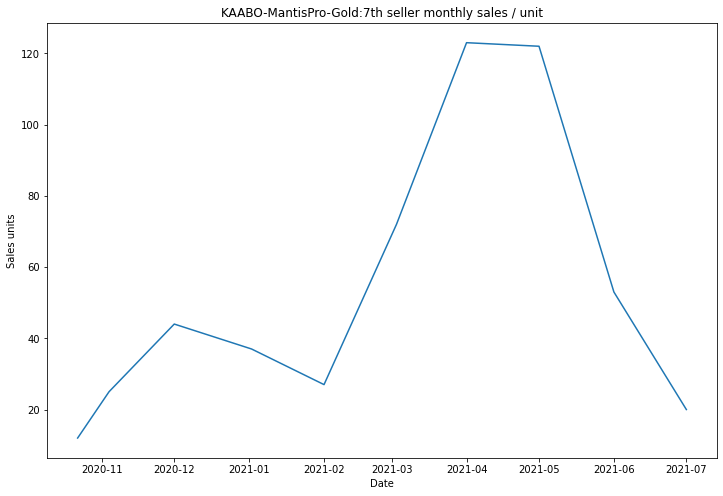

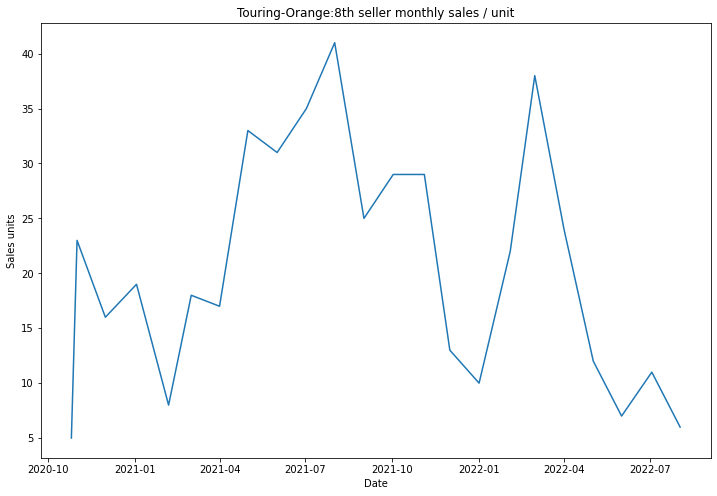

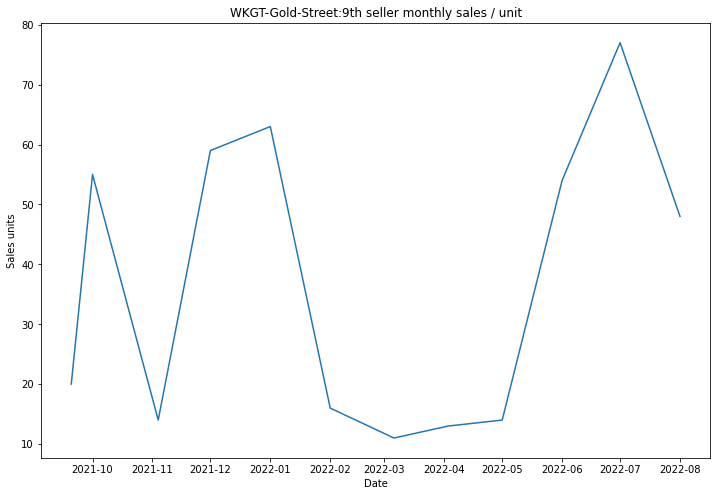

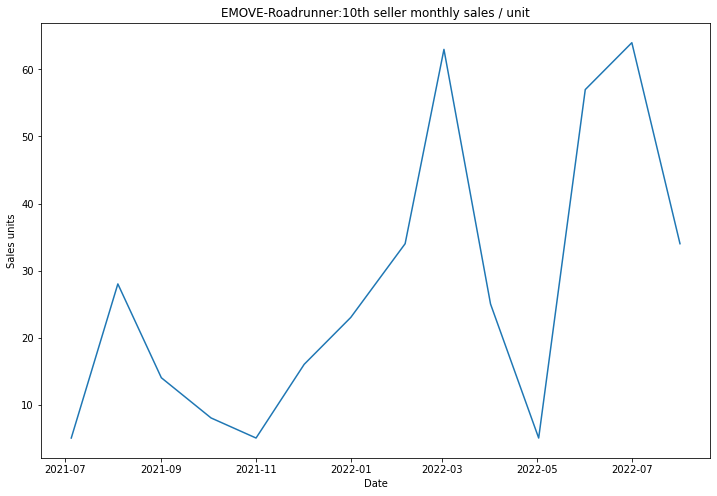

In [ ]:
for rank in range(10):
  rank_seller = ith_best_seller(rank)
  # Plot scatter
  fig = plt.figure(figsize=(12, 8))
  plt.plot(df_monthly[df_monthly['variant_sku'] == rank_seller]['date'], df_monthly[df_monthly['variant_sku'] == rank_seller]["net_quantity"])

  # Labelling 

  plt.xlabel("Date")
  plt.ylabel("Sales units")
  plt.title(rank_seller + ':' + str(rank+1) + 'th seller monthly sales / unit')

  # Display
  plt.show()


In [4]:
_### default_na 고쳐야함 --- 데이터 더 필요하기 때문. 근데 일단 cruiser 이런거 찾는데 방해되서 False로 킾

###date range
start_date = '2019-01-01'
end_date = '2022-08-15'
###
mask = (scooter_df['day'] > start_date) & (scooter_df['day'] <= end_date)
scooter_df = scooter_df.loc[mask]

#sort date
scooter_df['day'] = pd.to_datetime(scooter_df['day'])
scooter_df.sort_values(by='day', inplace = True)

###Select Model  === CRUISER only
cruiser = 'Cruiser' or "CRUISER"
cruiser_df = scooter_df[scooter_df['variant_sku'].str.contains('Cruiser|CRUISER')]
###


#Change Column Names
cruiser_df = cruiser_df.rename({'variant_sku': 'item_id', 'net_quantity': 'y', 'day': 'ds', 
                 'gross_sales': 'price', 'shipping_postal_code': 'location', 'product_vendor': 'brand'}, axis=1) 

#filter out no need data
cruiser_df = cruiser_df.drop(['discounts', 'returns', 'net_sales', 'taxes', 'total_sales'], axis=1)

#Order number greater than 0 - return/cancellation filtering
cruiser_df = cruiser_df[cruiser_df['y'] > 0]

#North America Order filtering
cruiser_df = cruiser_df[(cruiser_df['shipping_country'] == 'United States') | (cruiser_df['shipping_country'] == 'Canada')| (cruiser_df['shipping_country'].isna())]

#color 
black_df = cruiser_df[(cruiser_df['item_id'] == 'Cruiser-Orange') | (cruiser_df['item_id'] == 'CRUISER-Orange')]
black_df = black_df.groupby(by=['ds','item_id']).sum().groupby(level=[0]).cumsum()
black_df.reset_index(inplace=True)


black_df

###
#more_series_df = scooter_df.drop(['demand', 'location', 'brand'], axis=1)
#meta_df = scooter_df.drop(['demand', 'location', 'timestamp', 'promotion_applied', 'location', 'price' ], axis=1)

# print(timeseries_df)
# print(more_series_df)
# print(meta_df)

NameError: name 'scooter_df' is not defined

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import os
import itertools
from prophet.diagnostics import performance_metrics
import joblib
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Auto data extractor

In [ ]:
def extract_data(rank, granularity = 'daily'):
  sku = ith_best_seller(rank)
  print('Currently extracting data for product {} with rank {} (indexed starting from 0) on a {} granularity......'.format(sku, rank, granularity))
  if granularity == 'daily':
    return df[df['variant_sku'] == sku].sort_values('date').reset_index()[['variant_sku', 'date', 'net_quantity', 'week', 'month', 'year']]
  elif granularity == 'weekly':
    return df_weekly[df_weekly['variant_sku'] == sku].sort_values('date').reset_index()[['variant_sku', 'date', 'net_quantity']]
  elif granularity == 'monthly':
    return df_monthly[df_monthly['variant_sku'] == sku].sort_values('date').reset_index()[['variant_sku', 'date', 'net_quantity']]
  else:
    print("Desired granularity is invalid")

extract_data(0, 'daily')

NameError: name 'ith_best_seller' is not defined

# Splitting test and train data

In [ ]:
# Split data in train and test
df_final = extract_data(0, granularity = 'weekly')

train_percentage = 0.8
train_final_index = round(len(df_final) * (train_percentage))
train = df_final[0:train_final_index]
test = df_final[train_final_index:]

# y_test = cruiser_df[['y']][train_final_index:]
train = train[['date', 'net_quantity']]
train.columns = ['ds', 'y']
train.head()

Currently extracting data for product CRUISER-Orange with rank 0 (indexed starting from 0) on a weekly granularity......


,ds,y
0,2019-08-06,1
1,2019-08-12,3
2,2019-08-27,3
3,2019-09-10,3
4,2019-09-20,2


In [ ]:
test = test[['date', 'net_quantity']]
test.columns = ['ds', 'y']
test.head()

,ds,y
126,2022-01-11,5
127,2022-01-17,8
128,2022-01-24,9
129,2022-02-02,9
130,2022-02-07,12


In [ ]:
test['y']

126     5
127     8
128     9
129     9
130    12
131    12
132     9
133    15
134    27
135    32
136    12
137    18
138    18
139    38
140    37
141    21
142    18
143    13
144    13
145    11
146    13
147    11
148     9
149     8
150     7
151    12
152    22
153    13
154     9
155     9
156     7
157     7
Name: y, dtype: int64

In [ ]:
prediction['yhat']

0      1.049194
1      0.924358
2      0.868354
3      0.934597
4      0.979247
         ...   
171    3.069155
172    2.963542
173    3.059075
174    3.227097
175    3.414960
Name: yhat, Length: 176, dtype: float64

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmq61s1o3/rlnrm1ek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmq61s1o3/1u_8o5jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53500', 'data', 'file=/tmp/tmpmq61s1o3/rlnrm1ek.json', 'init=/tmp/tmpmq61s1o3/1u_8o5jv.json', 'output', 'file=/tmp/tmp9v59rc_r/prophet_model-20220819192346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error: 10.655072517862374


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
27,2022-07-18,10.601177,-4.080185,32.426043,-4.438699,26.570671,2.904043,2.904043,2.904043,1.018397,1.018397,1.018397,1.885645,1.885645,1.885645,0.0,0.0,0.0,13.505220
28,2022-07-26,10.523201,-6.445251,31.982445,-5.468882,27.634230,2.589591,2.589591,2.589591,0.534567,0.534567,0.534567,2.055025,2.055025,2.055025,0.0,0.0,0.0,13.112792
29,2022-08-02,10.454972,-2.347031,35.802724,-6.308853,28.459287,6.511570,6.511570,6.511570,0.434126,0.434126,0.434126,6.077444,6.077444,6.077444,0.0,0.0,0.0,16.966541
30,2022-08-09,10.386742,-5.078489,37.346566,-7.051542,29.514498,6.744235,6.744235,6.744235,-2.382705,-2.382705,-2.382705,9.126941,9.126941,9.126941,0.0,0.0,0.0,17.130978
31,2022-08-15,10.328260,-1.869902,40.560656,-7.711997,30.241249,8.520808,8.520808,8.520808,0.125968,0.125968,0.125968,8.394840,8.394840,8.394840,0.0,0.0,0.0,18.849068


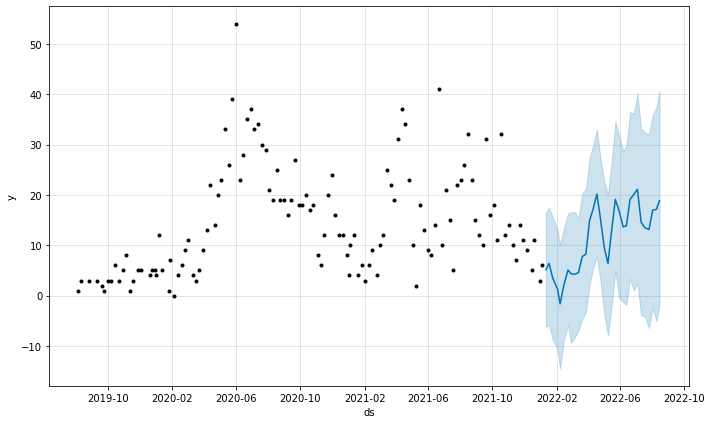

In [ ]:
model = Prophet(changepoint_prior_scale= 1, 
                seasonality_prior_scale=5., 
                holidays_prior_scale= 0.01, 
        yearly_seasonality=True, 
        weekly_seasonality= False,
        daily_seasonality=False, 
        interval_width=0.95)
model.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=3
    )
model.add_seasonality(
        name='yearly', 
        period=365, 
        fourier_order=3
    )

# model.fit(cruiser_df_train)
# prediction = model.predict(cruiser_df_test)

model.fit(train)
prediction = model.predict(test[['ds']])

# with open('fb_target_model.json', 'w') as fout:
#     json.dump(model_to_json(model), fout)df_future
    

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test['y'], prediction['yhat'])))
#print('R2 score - ', r2_score(test[-7:], prediction['yhat'][-7:]))
model.plot(prediction)

prediction.tail()

In [ ]:
# seasonality regressor
# https://nbviewer.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

In [ ]:
#save as CSV file

import os  
os.makedirs('./Order_data/Cruiser/', exist_ok=True) 
prediction.to_csv('./Order_data/Cruiser/prediction.csv', index=False) 
cruiser_df.to_csv('./Order_data/Cruiser/cruiser_df.csv', index=False) 


PermissionError: [Errno 13] Permission denied: './Order_data/Cruiser/prediction.csv'

In [ ]:
cruiser_df.to_csv('./Order_data/Cruiser/cruiser_df.csv', index=False) 

ValueError: invalid literal for int() with base 10: 'Date'

In [ ]:
#save as CSV file

import os  
os.makedirs('./Order_data/Cruiser/', exist_ok=True) 


timeseries_df.to_csv('./Order_data/Cruiser/timeseries_df.csv', index=False) 
more_series_df.to_csv('./Order_data/Cruiser/more_series_df.csv', index=False) 
meta_df.to_csv('./Order_data/Cruiser/meta_df.csv', index=False) 
